In [1]:
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [2]:
# for calculating power analysis for t-test with independent samples
from statsmodels.stats.power import TTestIndPower

# Power Analysis

In [ ]:
effect = 0.8
alpha = 0.05
power = 0.8

analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect,
                              power=power,
                              nobs1=None, 
                              ratio=1.0, # num_obs_2 = num_obs_1 * ratio
                              alpha=alpha)

print(f"""We need at least sample size of {round(result, 2)} to achieve 
          - power >= {power} with alpha = 0.05
          - effect size {effect}""")

In [ ]:
analysis.plot_power(dep_var="nobs",
                    nobs=np.arange(5, 100),
                    effect_size=np.array([0.2, 0.5, 0.8]))

pyplot.show()

## Example

In [13]:
def calc_cohens_ds(g1_arr, g2_arr, eq_grp_size=False):
    """Effect size for difference between groups with unequal group size
    
    Parameters
    ---------
    g1, g2 : np.array
    """
    u_1 = g1_arr.mean()
    std_1 = g1_arr.std()
    n1 = len(g1_arr)
    
    u_2 = g2_arr.mean()
    std_2 = g2_arr.std()
    n2 = len(g2_arr)
    
    if not eq_grp_size:
        pooled_std = np.sqrt( ((n1-1)*(std_1**2) + (n2-1)*(std_2**2) ) / (n1+n2+2) )
    else:
        pooled_std = np.sqrt((std_1**2 + std_2**2)/2)
    
    d = (u_1 - u_2) / pooled_std
    return d

In [74]:
effect_size = calc_cohens_ds(test_ctr, control_ctr)
alpha = 0.05
power = 0.8

ratio = round(len(control_group)/ len(test_group), 4) # sample2 relative to sample1
analysis = TTestIndPower()
result = analysis.solve_power(effect_size=effect_size,
                              power=power,
                              nobs1=None,
                              ratio=ratio,
                              alpha=alpha)

print(f"""We need at least sample size of {round(result, 2)} to achieve 
          - power >= {power} with alpha = 0.05
          - effect size {effect_size}""")

We need at least sample size of 520642.24 to achieve 
          - power >= 0.8 with alpha = 0.05
          - effect size -0.003932061259521132


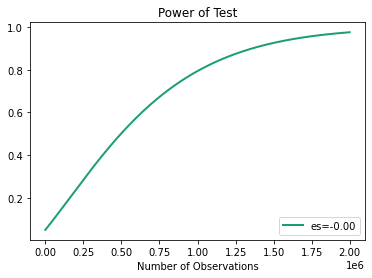

In [72]:
analysis.plot_power(dep_var="nobs",
                    nobs=np.arange(5, 2_000_000, 1_000),
                    effect_size=np.array([effect_size]))

pyplot.show()